In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from string import punctuation
from tensorflow.keras import layers, models
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
df = pd.read_csv('dataset/dataset.csv')
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


df = pd.read_csv('dataset.csv')
df.head()

In [3]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation
    punctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
    text = ''.join(char for char in text if char not in punctuation)


    text = ''.join(char for char in text if not char.isdigit())

    words = word_tokenize(text)


    stemmer = PorterStemmer()

    stemmed_words = [stemmer.stem(word) for word in words]


    preprocessed_text = ' '.join(stemmed_words)

    return preprocessed_text

In [4]:
df['preprocessed_text'] = df['Text'].apply(preprocess_text)
df['preprocessed_text'].head()

0    natur in the broadest sens is the natur physic...
1    natur can refer to the phenomena of the physic...
2    the studi of natur is a larg if not the onli p...
3    although human are part of natur human activ i...
4    the word natur is borrow from the old french n...
Name: preprocessed_text, dtype: object

In [5]:
text = df['preprocessed_text']
language = df['Language']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text, language, test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
label_encoder = LabelEncoder()

X_train_v = vectorizer.fit_transform(X_train)
X_test_v = vectorizer.transform(X_test)

y_train_v = label_encoder.fit_transform(y_train)
y_test_v = label_encoder.transform(y_test)

print("Training set - Text shape:", X_train_v.shape)
print("Testing set - Text shape:", X_test_v.shape)



Training set - Text shape: (8269, 31507)
Testing set - Text shape: (2068, 31507)


In [7]:
vectorizer = CountVectorizer()
label_encoder = LabelEncoder()

text_v = vectorizer.fit_transform(text)
language_v = label_encoder.fit_transform(language)

Accuracy: 0.980174081237911


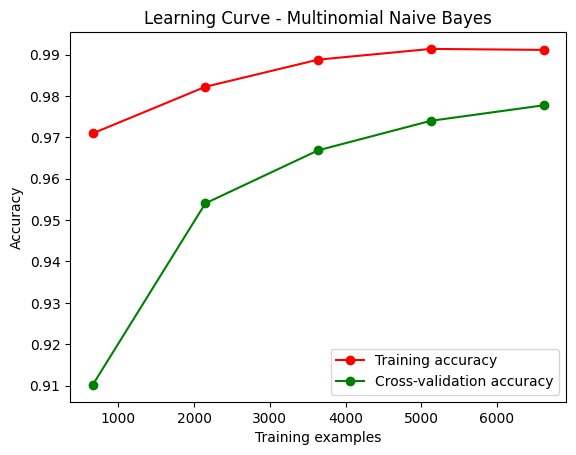

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve

model = MultinomialNB()
model.fit(X_train_v, y_train_v)

y_pred = model.predict(X_test_v)

y_pred_labels = label_encoder.inverse_transform(y_pred)

accuracy = accuracy_score(y_test, y_pred_labels)
print("Accuracy:", accuracy)

train_sizes, train_scores, test_scores = learning_curve(model, X_train_v, y_train_v, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve - Multinomial Naive Bayes")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training accuracy")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation accuracy")
plt.legend(loc="best")
plt.show()


In [9]:
def language_detector(input_xlanguage):

    input_xlanguage_v = vectorizer.transform([input_xlanguage])

    language_detected = (model.predict(input_xlanguage_v)[0])

    return language_detected

In [10]:
def predict(input_text):

    predicted_language = label_encoder.inverse_transform((language_detector(input_text)).reshape(-1))
    print(f"The predicted language is: {predicted_language}")

# predict("Привет, это тест")
# predict("we are boys")
# predict("انا مصري ")
# predict("mon petit.")

**ANN**

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.2462 - loss: 2.5955 - val_accuracy: 0.8803 - val_loss: 1.2389
Epoch 2/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7474 - loss: 1.2010 - val_accuracy: 0.9516 - val_loss: 0.4986
Epoch 3/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8896 - loss: 0.5714 - val_accuracy: 0.9661 - val_loss: 0.3114
Epoch 4/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9405 - loss: 0.3570 - val_accuracy: 0.9667 - val_loss: 0.2365
Epoch 5/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9594 - loss: 0.2557 - val_accuracy: 0.9674 - val_loss: 0.1982
Epoch 6/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9663 - loss: 0.1991 - val_accuracy: 0.9704 - val_loss: 0.1731
Epoch 7/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9759 - loss: 0.1496 - val_accuracy: 0.9704 - val_loss: 0.1583
Epoch 8/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9757 - loss: 0.1361 - val_accuracy: 0.9698 - v

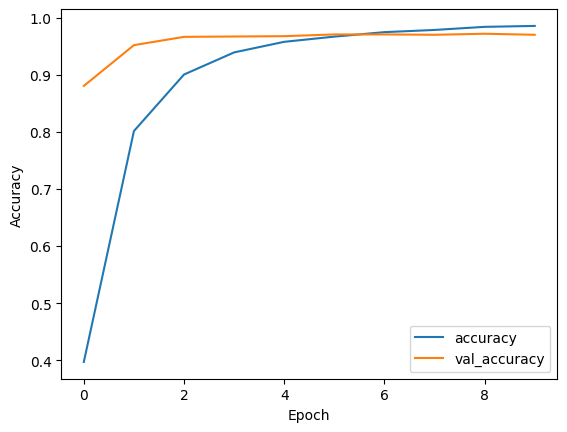

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9698 - loss: 0.1258
Test Accuracy (ANN): 0.9673518538475037


In [11]:
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X_train_v, y_train_v, test_size=0.4, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

def sort_indices(sparse_matrix):
    coo_matrix = sparse_matrix.tocoo()
    sorted_indices = np.argsort(coo_matrix.col)
    sorted_data = coo_matrix.data[sorted_indices]
    sorted_row = coo_matrix.row[sorted_indices]
    sorted_col = coo_matrix.col[sorted_indices]
    sorted_matrix = sparse_matrix.__class__((sorted_data, (sorted_row, sorted_col)), shape=coo_matrix.shape)
    return sorted_matrix


X_train_sorted = sort_indices(X_train_temp)
X_val_sorted = sort_indices(X_val)
X_test_sorted = sort_indices(X_test)

model_ann = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_v.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

model_ann.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

history = model_ann.fit(X_train_sorted, y_train_temp, epochs=10, batch_size=64, validation_data=(X_val_sorted, y_val))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

test_loss, test_accuracy = model_ann.evaluate(X_test_sorted, y_test)
print("Test Accuracy (ANN):", test_accuracy)



Epoch 1/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3571 - loss: 2.1747 - val_accuracy: 0.8748 - val_loss: 0.6520
Epoch 2/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7999 - loss: 0.7644 - val_accuracy: 0.9208 - val_loss: 0.3608
Epoch 3/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8263 - loss: 1.2040 - val_accuracy: 0.9365 - val_loss: 0.3111
Epoch 4/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8998 - loss: 0.3673 - val_accuracy: 0.9468 - val_loss: 0.2544
Epoch 5/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9216 - loss: 0.2959 - val_accuracy: 0.9420 - val_loss: 0.2256
Epoch 6/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9510 - loss: 0.1916 - val_accuracy: 0.9504 - val_loss: 0.1937
Epoch 7/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9632 - loss: 0.1449 - val_accuracy: 0.9438 - val_loss: 0.2065
Epoch 8/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9634 - loss: 0.1407 - val_accuracy: 0.9450 - val_loss:

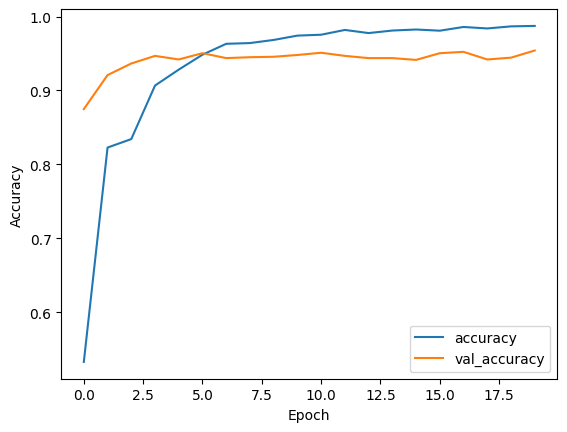

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9589 - loss: 0.1457
Test Accuracy (ANN): 0.9510278105735779


In [12]:
from tensorflow.keras.optimizers import SGD

X_train_temp, X_test, y_train_temp, y_test = train_test_split(X_train_v, y_train_v, test_size=0.4, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

def sort_indices(sparse_matrix):
    coo_matrix = sparse_matrix.tocoo()
    sorted_indices = np.argsort(coo_matrix.col)
    sorted_data = coo_matrix.data[sorted_indices]
    sorted_row = coo_matrix.row[sorted_indices]
    sorted_col = coo_matrix.col[sorted_indices]
    sorted_matrix = sparse_matrix.__class__((sorted_data, (sorted_row, sorted_col)), shape=coo_matrix.shape)
    return sorted_matrix

X_train_sorted = sort_indices(X_train_temp)
X_val_sorted = sort_indices(X_val)
X_test_sorted = sort_indices(X_test)

model_ann = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_v.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

model_ann.compile(optimizer=SGD(learning_rate=0.5),  # Set learning rate as desired
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

history = model_ann.fit(X_train_sorted, y_train_temp, epochs=20, batch_size=64, validation_data=(X_val_sorted, y_val))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

test_loss, test_accuracy = model_ann.evaluate(X_test_sorted, y_test)
print("Test Accuracy (ANN):", test_accuracy)

Epoch 1/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.1794 - loss: 2.6152 - val_accuracy: 0.7140 - val_loss: 1.5928
Epoch 2/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.5316 - loss: 1.6114 - val_accuracy: 0.8416 - val_loss: 0.7531
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7464 - loss: 0.9888 - val_accuracy: 0.9172 - val_loss: 0.4135
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.8358 - loss: 0.5978 - val_accuracy: 0.9407 - val_loss: 0.3047
Epoch 5/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.8738 - loss: 0.4385 - val_accuracy: 0.9571 - val_loss: 0.2381
Epoch 6/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9163 - loss: 0.3988 - val_accuracy: 0.9456 - val_loss: 0.2213
Epoch 7/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9335 - loss: 0.2710 - val_accuracy: 0.9468 - val_loss: 0.2214
Epoch 8/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9542 - loss: 0.1996 - val_accuracy: 0.9516 - v

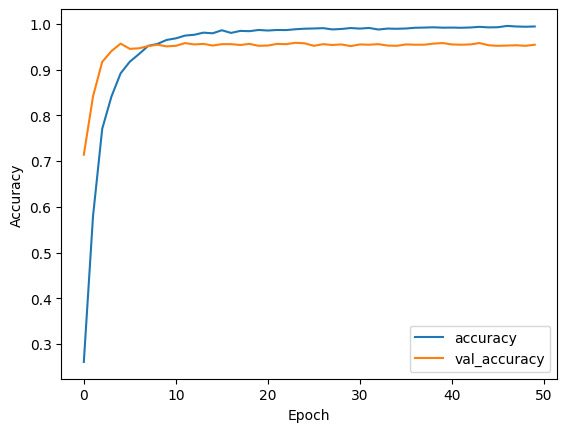

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9592 - loss: 0.1520
Test Accuracy (ANN): 0.9510278105735779


In [13]:
from tensorflow.keras.optimizers import Adagrad
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

X_train_temp, X_test, y_train_temp, y_test = train_test_split(X_train_v, y_train_v, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

def sort_indices(sparse_matrix):
    coo_matrix = sparse_matrix.tocoo()
    sorted_indices = np.argsort(coo_matrix.col)
    sorted_data = coo_matrix.data[sorted_indices]
    sorted_row = coo_matrix.row[sorted_indices]
    sorted_col = coo_matrix.col[sorted_indices]
    sorted_matrix = sparse_matrix.__class__((sorted_data, (sorted_row, sorted_col)), shape=coo_matrix.shape)
    return sorted_matrix

X_train_sorted = sort_indices(X_train_temp)
X_val_sorted = sort_indices(X_val)
X_test_sorted = sort_indices(X_test)

model_ann = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train_v.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

model_ann.compile(optimizer=Adagrad(learning_rate=0.07),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

history = model_ann.fit(X_train_sorted, y_train_temp, epochs=50, batch_size=64, validation_data=(X_val_sorted, y_val))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

test_loss, test_accuracy = model_ann.evaluate(X_test_sorted, y_test)
print("Test Accuracy (ANN):", test_accuracy)
